In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.utils import all_estimators
%matplotlib inline

In [34]:
dataset = "../data/diabetes.csv"

df = pd.read_csv(dataset)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

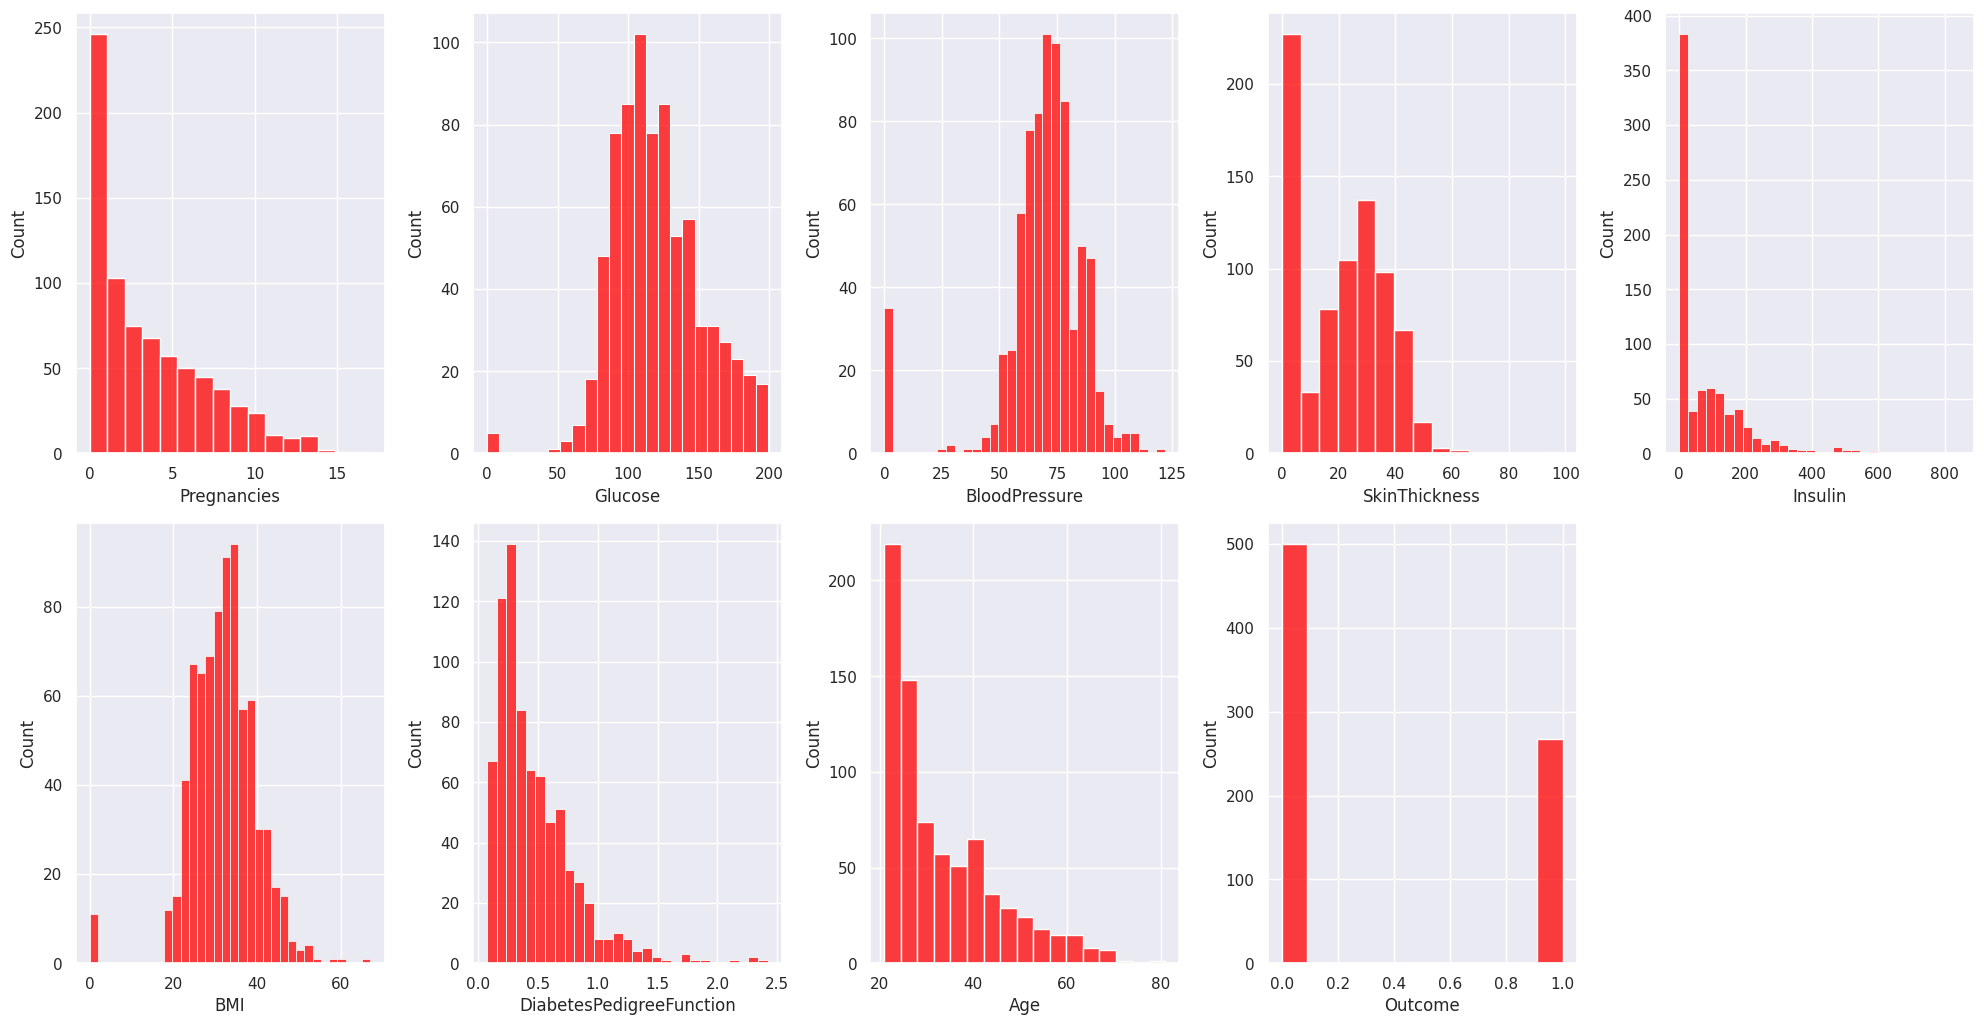

In [36]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 9:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1 

plt.tight_layout()
plt.show()

In [37]:
print((df == 0).sum())

zero_not_accepted = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in zero_not_accepted:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NaN, mean)

print((df == 0).sum())

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64
Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64


In [38]:
train, test = train_test_split(df, test_size=0.4, random_state=28)
train, validation = train_test_split(df, test_size=0.1, random_state=28)

print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Validation set has {validation.shape[0]} rows and {validation.shape[1]} columns")
test.head()

Train set has 691 rows and 9 columns
Test set has 308 rows and 9 columns
Validation set has 77 rows and 9 columns


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
728,2,175.0,88.0,29.0,155.0,22.9,0.326,22,0
392,1,131.0,64.0,14.0,415.0,23.7,0.389,21,0
68,1,95.0,66.0,13.0,38.0,19.6,0.334,25,0
48,7,103.0,66.0,32.0,155.0,39.1,0.344,31,1
74,1,79.0,75.0,30.0,155.0,32.0,0.396,22,0


In [39]:
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    validation[col] = le.transform(validation[col])
    test[col] = le.transform(test[col])


# split data into features and target
X_train = train.drop('Outcome', axis=1)
y_train = train['Outcome']

X_test = test.drop('Outcome', axis=1)
y_test = test['Outcome']

X_validation = validation.drop('Outcome', axis=1)
y_validation = validation['Outcome']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)

In [40]:
def run_model(model, X_train, y_train, X_test, y_test, X_validation, y_validation):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'Model name\t\t: {model.__class__.__name__}')
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='YlGnBu_r')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()
    print(f"Validation score: {model.score(X_validation, y_validation)}") 
    print()
    return model, accuracy_score(y_test, y_pred), precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)

In [41]:
df_compare = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])

In [42]:
models = []

for name, model in all_estimators(type_filter='classifier'):
    models.append(model)

Model name		: AdaBoostClassifier


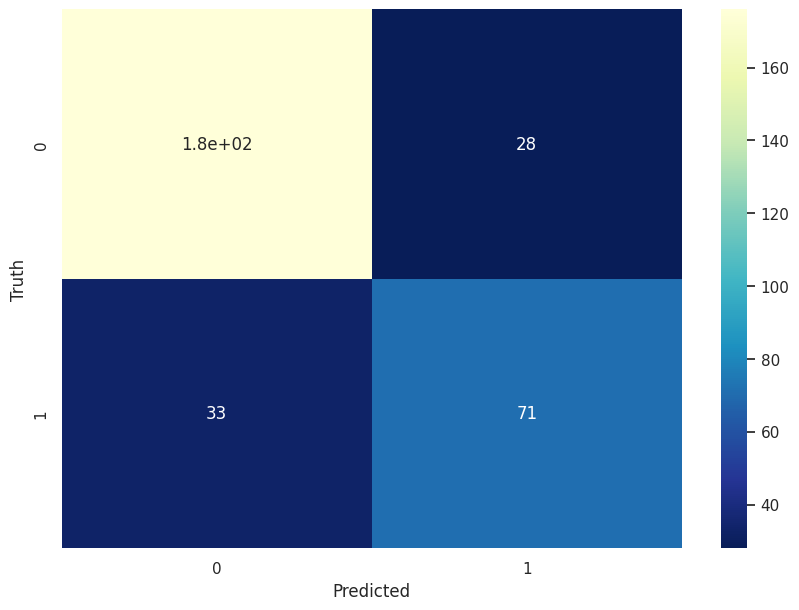

Validation score: 0.8051948051948052

Model name		: BaggingClassifier


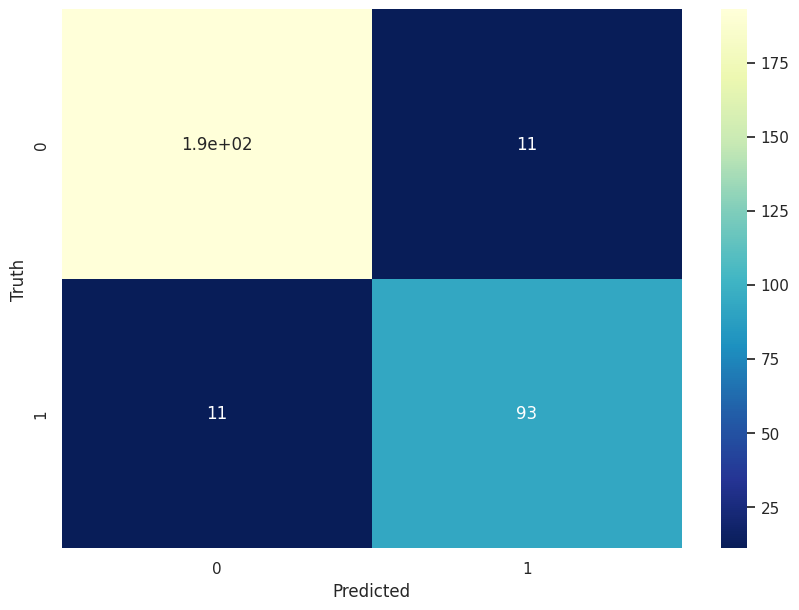

Validation score: 0.7532467532467533

Model name		: BernoulliNB


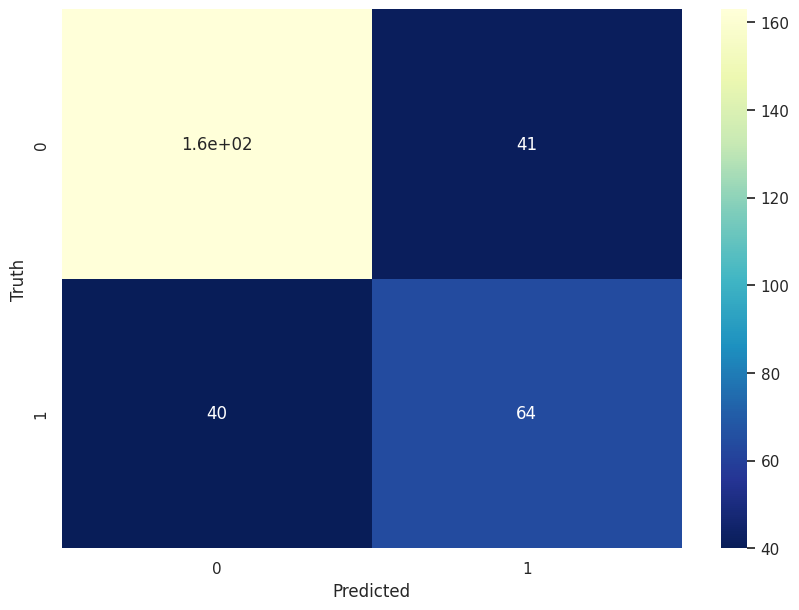

Validation score: 0.7662337662337663

Model name		: CalibratedClassifierCV


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


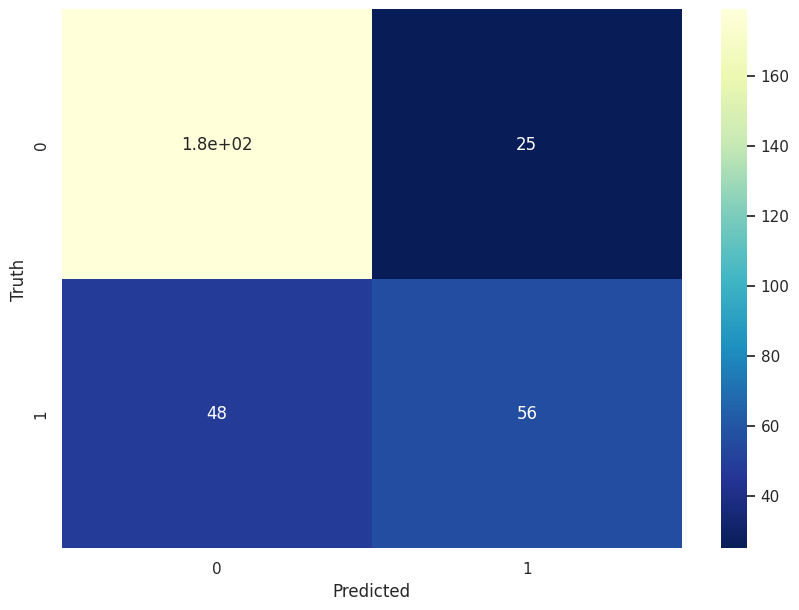

Validation score: 0.7792207792207793

Model name		: DecisionTreeClassifier


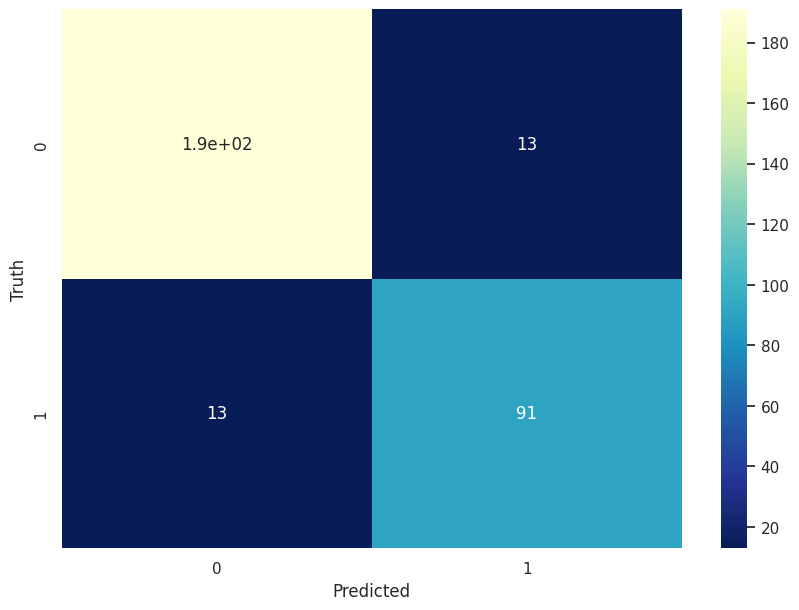

Validation score: 0.6623376623376623

Model name		: DummyClassifier


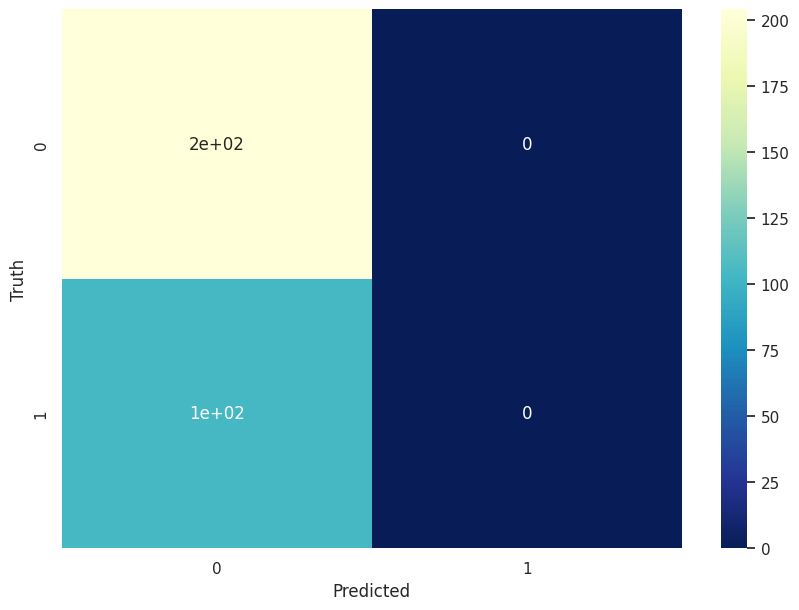

Validation score: 0.6883116883116883

Model name		: ExtraTreeClassifier


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


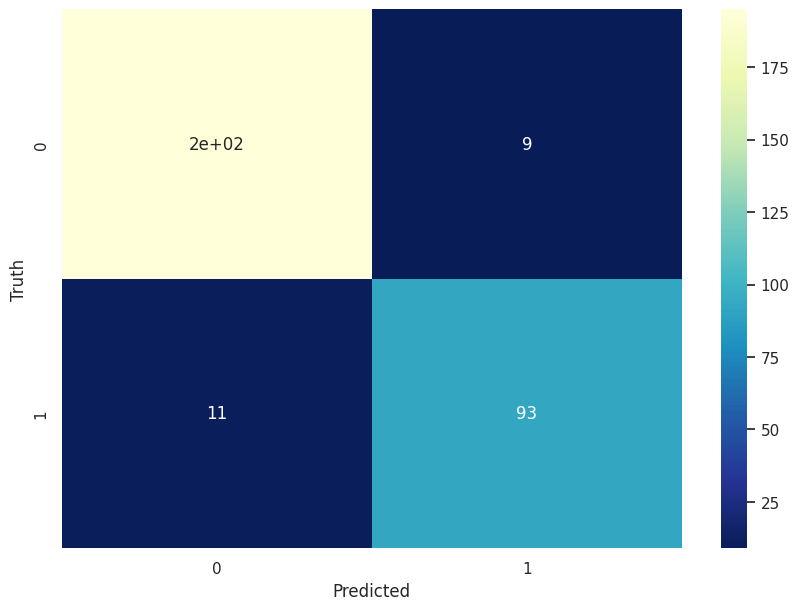

Validation score: 0.7402597402597403

Model name		: ExtraTreesClassifier


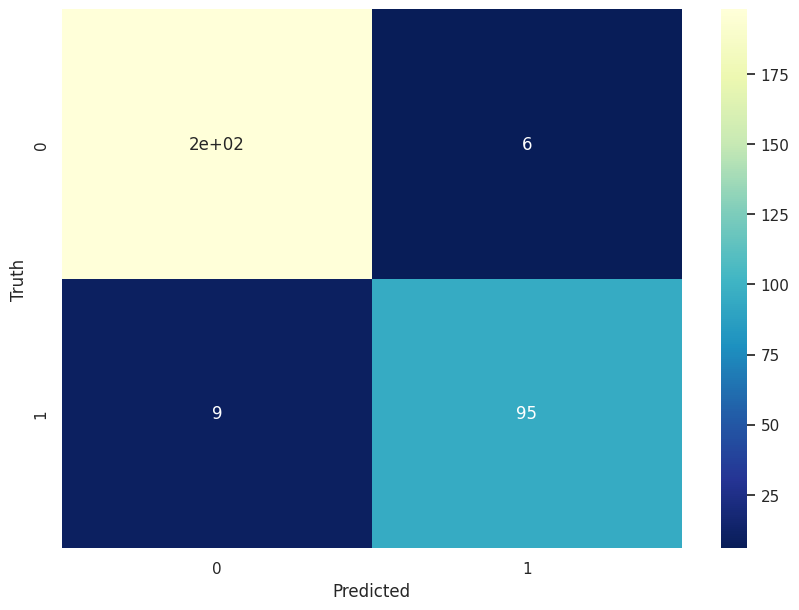

Validation score: 0.8051948051948052

Model name		: GaussianNB


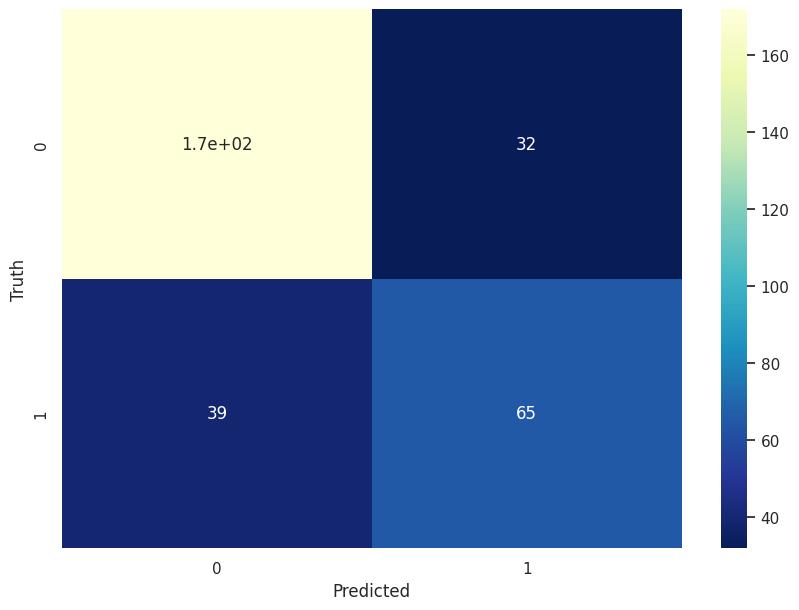

Validation score: 0.8051948051948052

Model name		: GaussianProcessClassifier


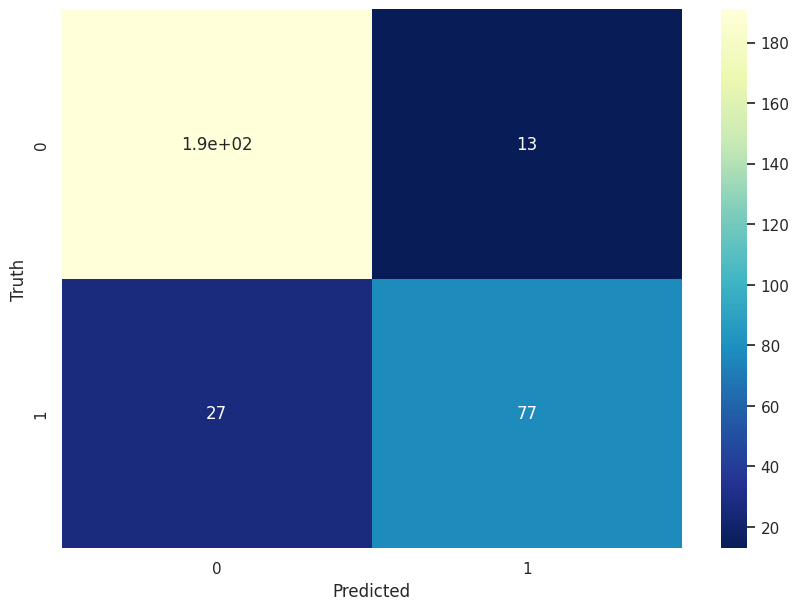

Validation score: 0.8051948051948052

Model name		: GradientBoostingClassifier


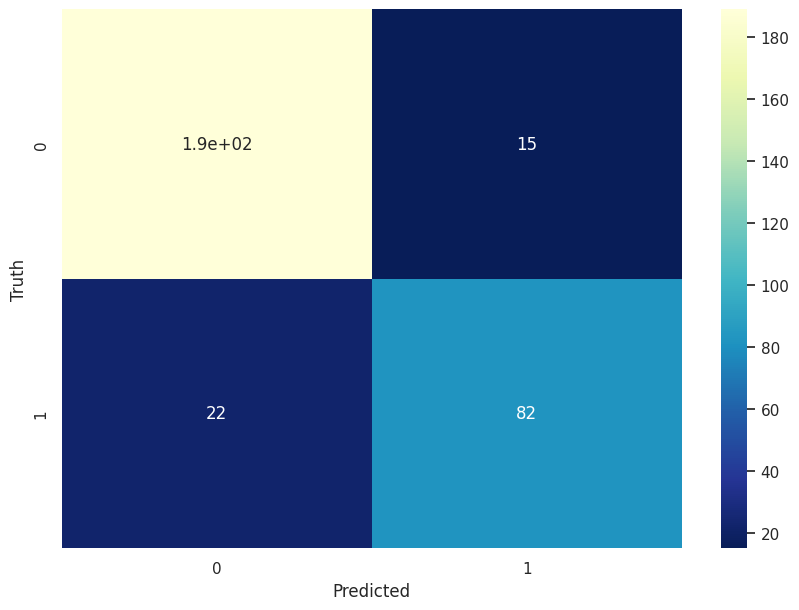

Validation score: 0.7792207792207793

Model name		: HistGradientBoostingClassifier


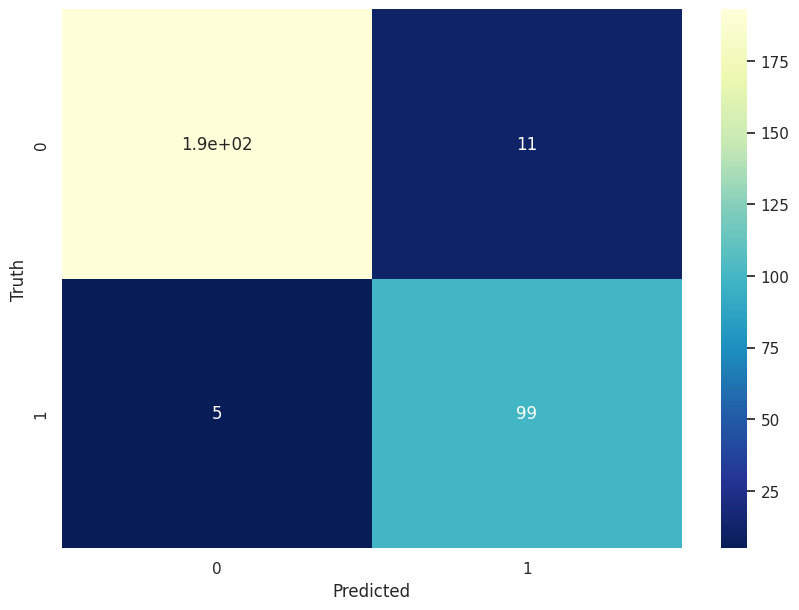

Validation score: 0.7922077922077922

Model name		: KNeighborsClassifier


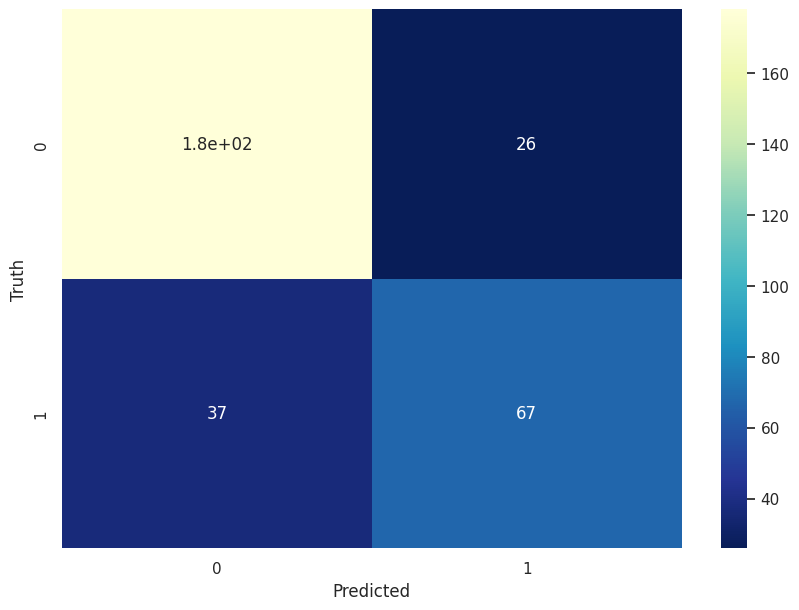

Validation score: 0.7922077922077922

Model name		: LabelPropagation


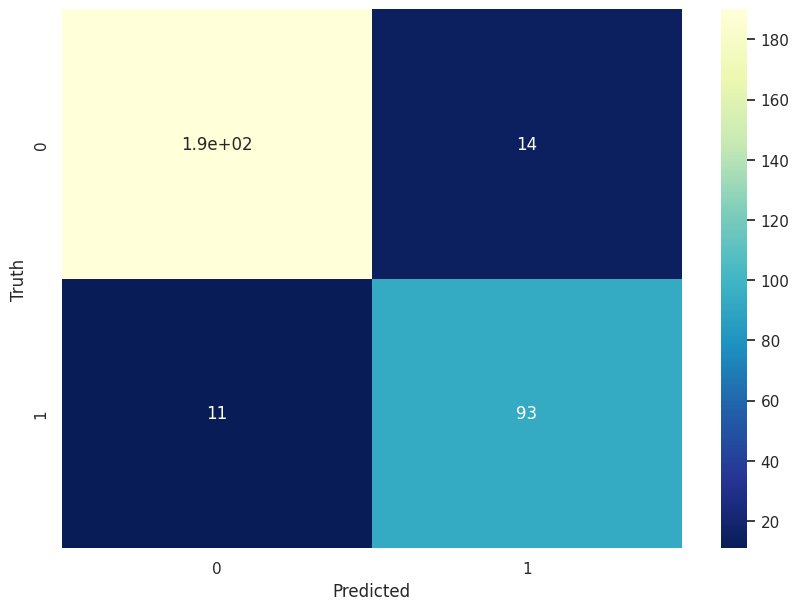

Validation score: 0.6753246753246753

Model name		: LabelSpreading


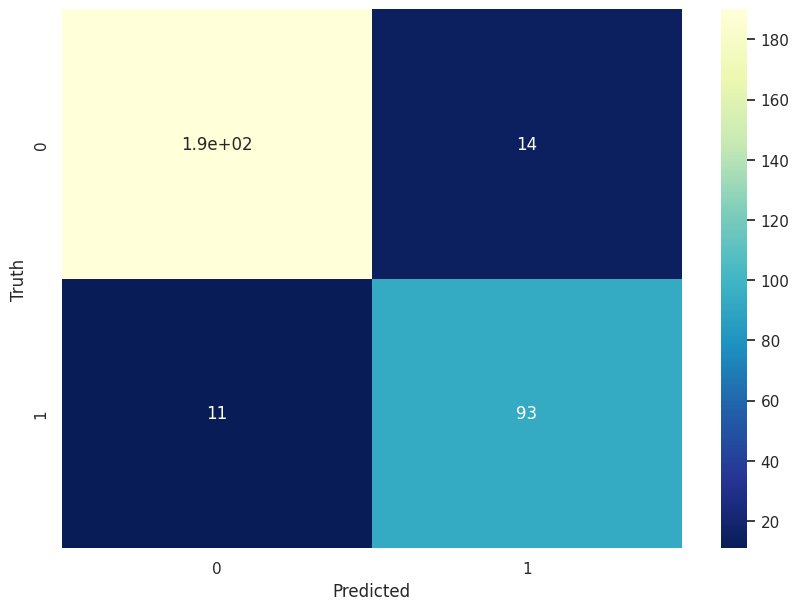

Validation score: 0.6753246753246753

Model name		: LinearDiscriminantAnalysis


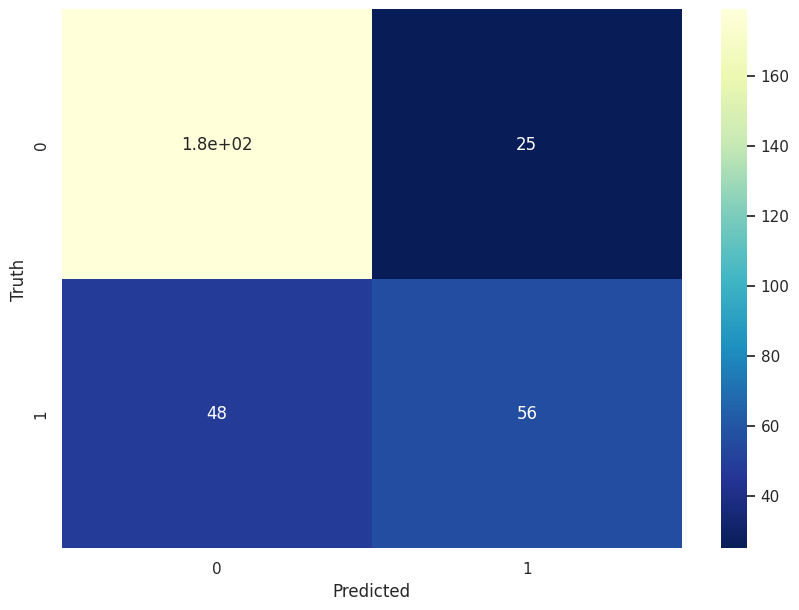

Validation score: 0.7792207792207793

Model name		: LinearSVC


/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


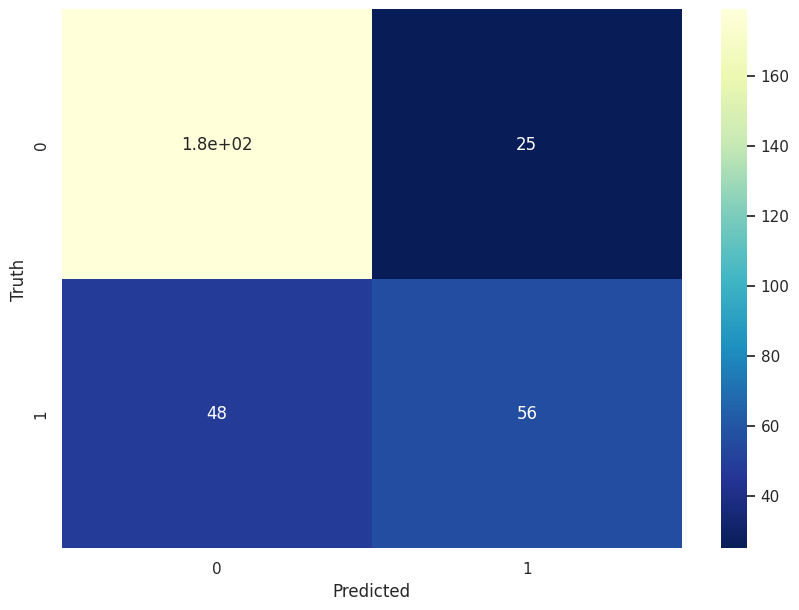

Validation score: 0.7792207792207793

Model name		: LogisticRegression


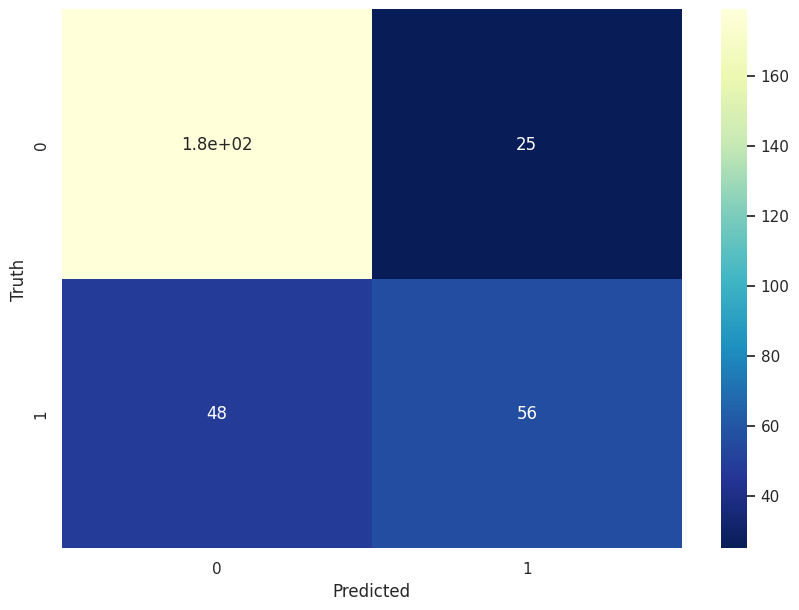

Validation score: 0.7792207792207793

Model name		: LogisticRegressionCV


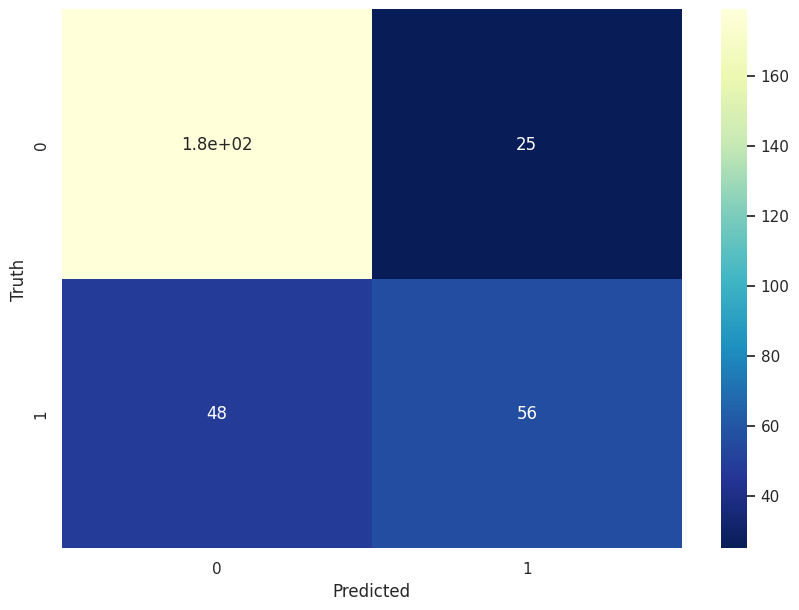

Validation score: 0.7792207792207793



/home/arrry/anaconda3/envs/ML/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model name		: MLPClassifier


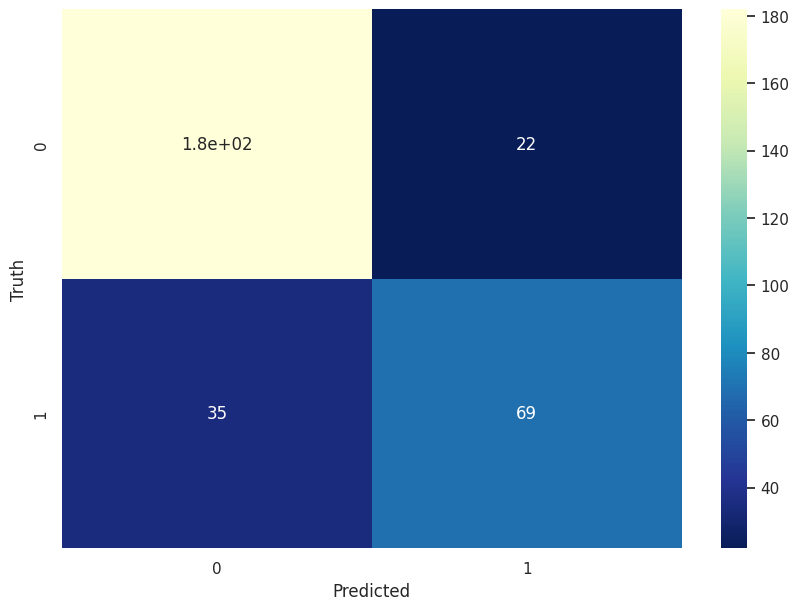

Validation score: 0.8571428571428571

Model name		: NearestCentroid


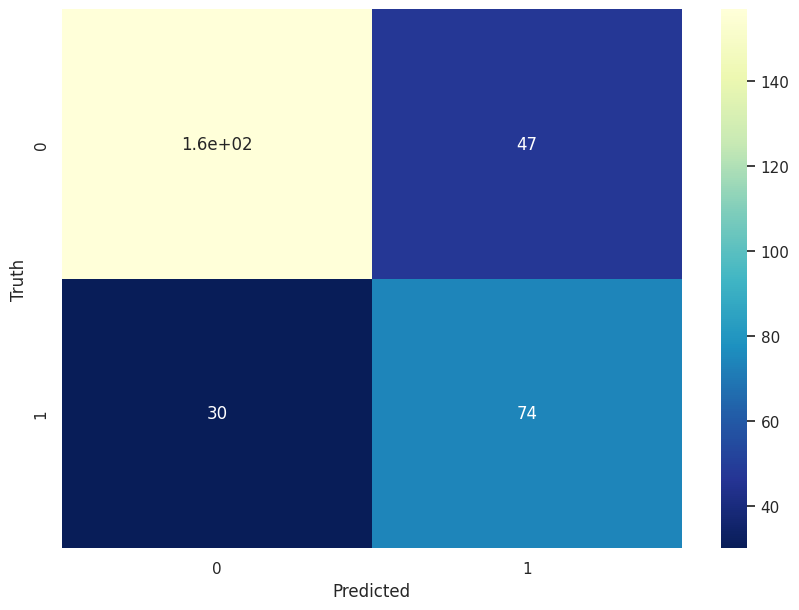

Validation score: 0.7402597402597403

Model name		: NuSVC


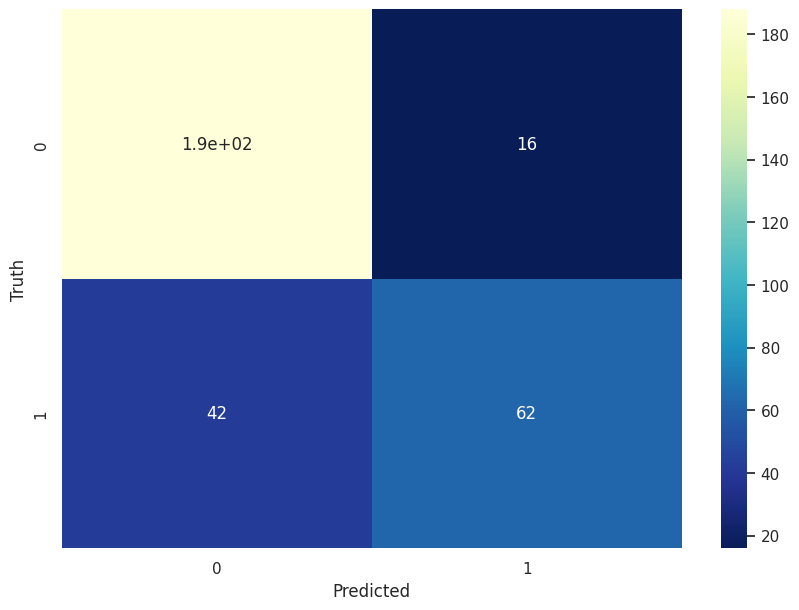

Validation score: 0.7792207792207793

Model name		: PassiveAggressiveClassifier


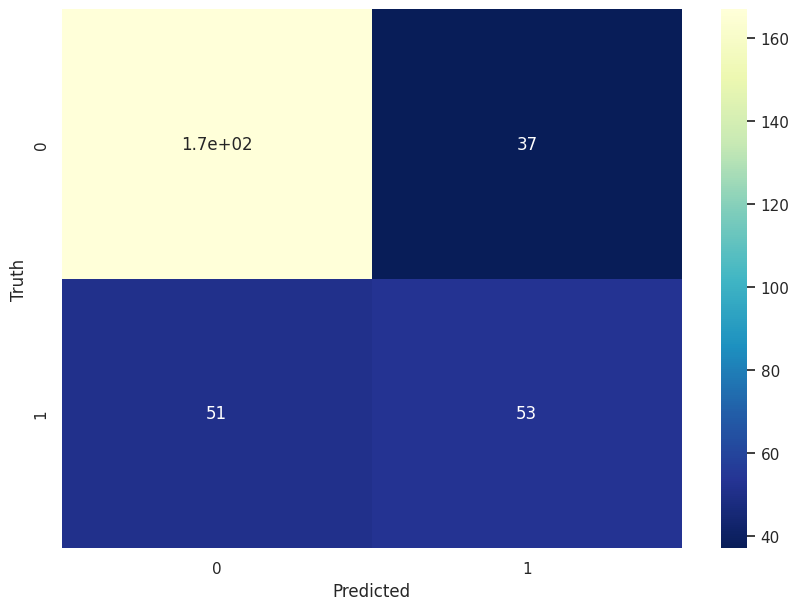

Validation score: 0.7142857142857143

Model name		: Perceptron


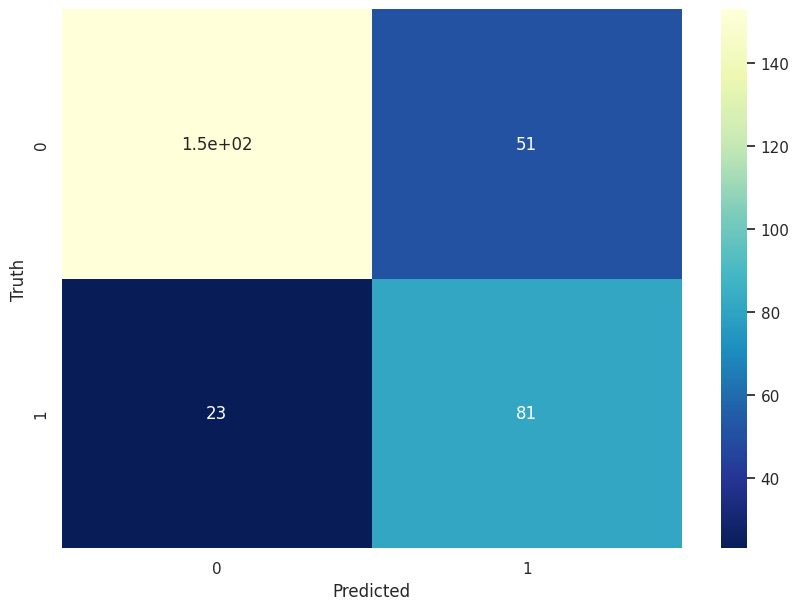

Validation score: 0.8441558441558441

Model name		: QuadraticDiscriminantAnalysis


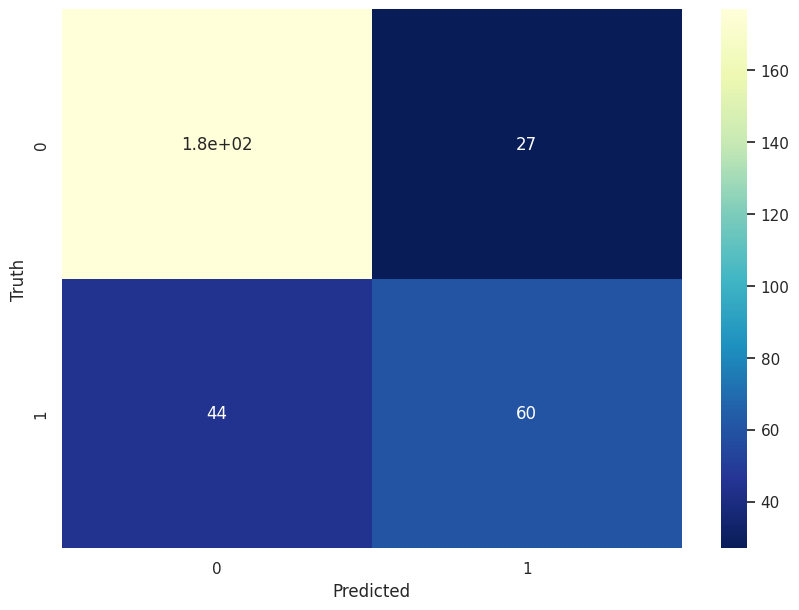

Validation score: 0.7662337662337663

Model name		: RandomForestClassifier


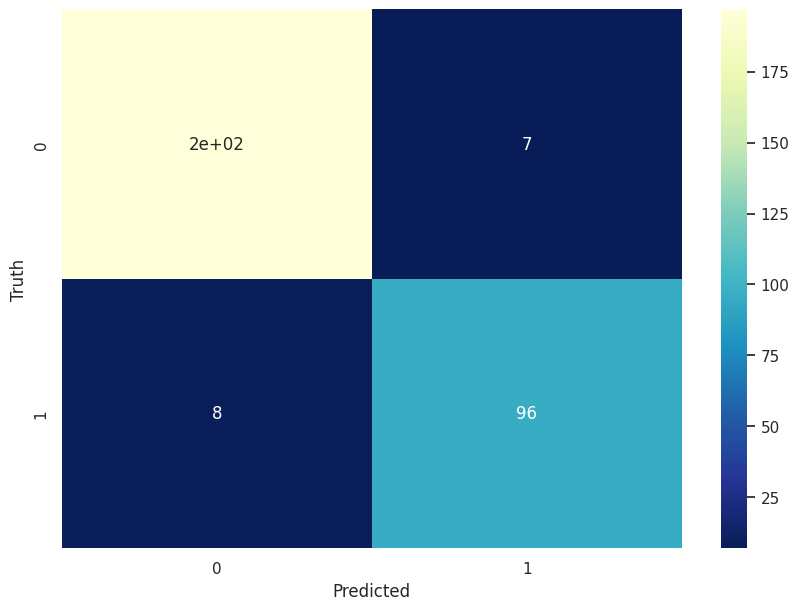

Validation score: 0.8051948051948052

Model name		: RidgeClassifier


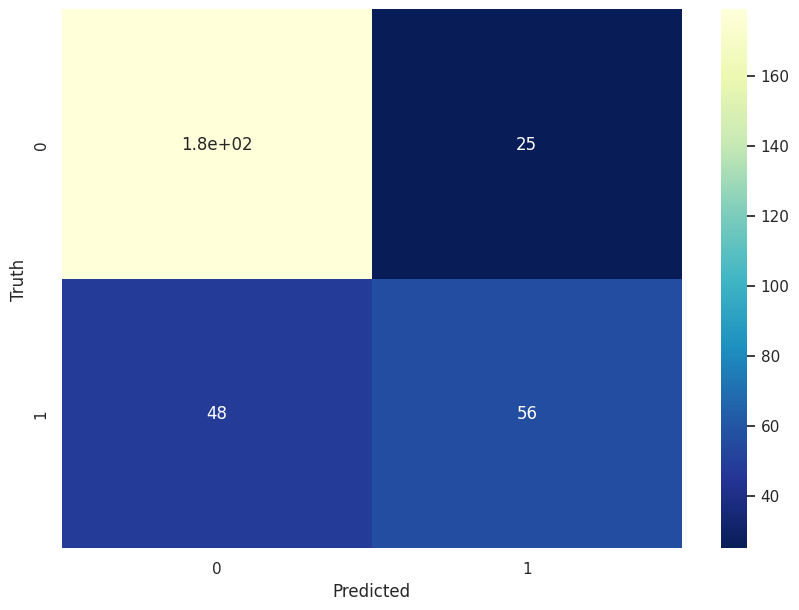

Validation score: 0.7792207792207793

Model name		: RidgeClassifierCV


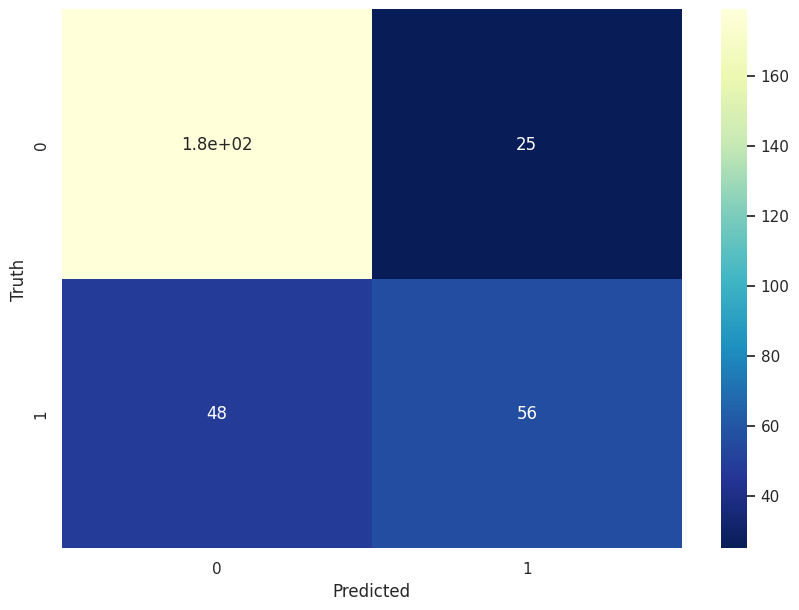

Validation score: 0.7792207792207793

Model name		: SGDClassifier


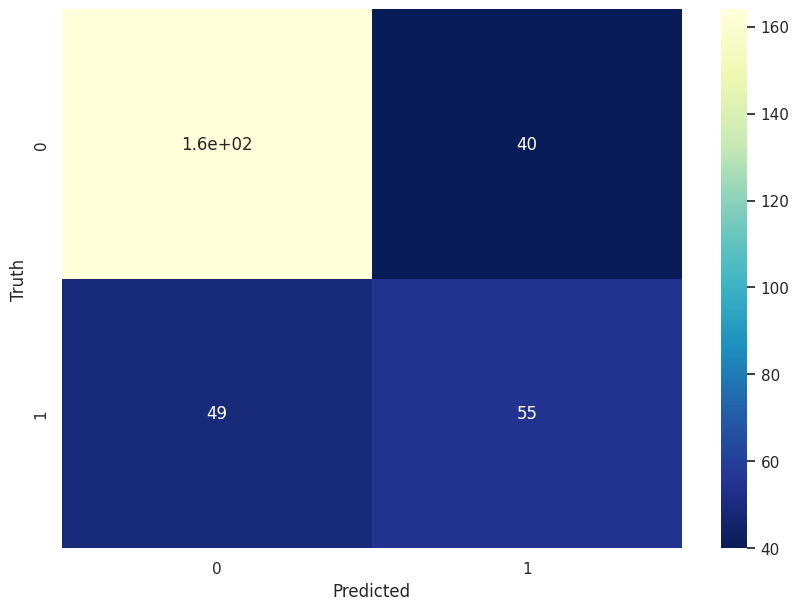

Validation score: 0.7402597402597403

Model name		: SVC


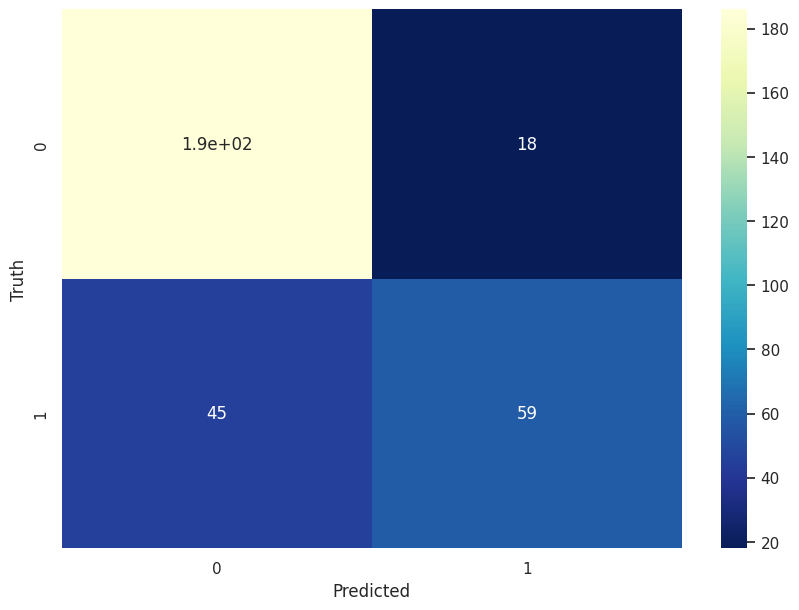

Validation score: 0.7662337662337663



In [43]:
for model in models:
    try:
        model, accuracy, precision, recall, f1 = run_model(model(), X_train, y_train, X_test, y_test, X_validation, y_validation)
        df_compare = pd.concat([df_compare, pd.DataFrame([[model.__class__.__name__, accuracy, precision, recall, f1]], columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1'])])
    except Exception as e:
        pass

In [47]:
def plot(metric):
    df_compare.sort_values(by = metric, ascending = False, inplace = True)
    sns.barplot(x = 'Model', y = metric, data = df_compare, palette = 'magma')
    plt.xticks(rotation = 90)
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.title(f'{metric} of all models')
    plt.show()    

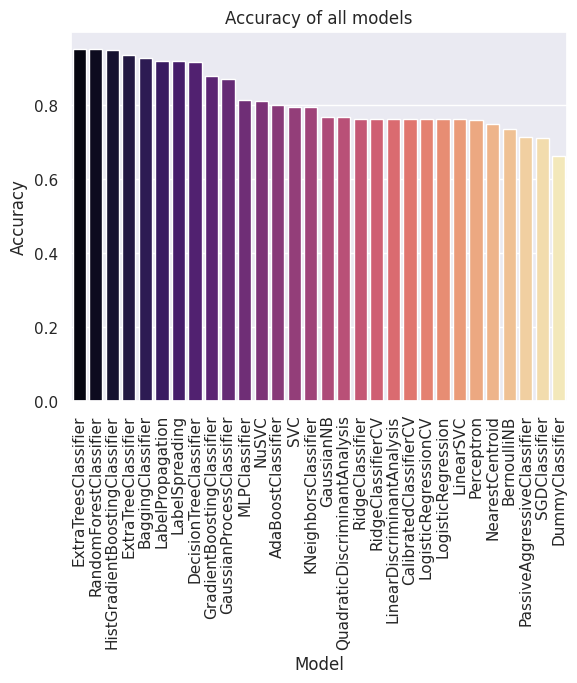

In [49]:
plot('Accuracy')

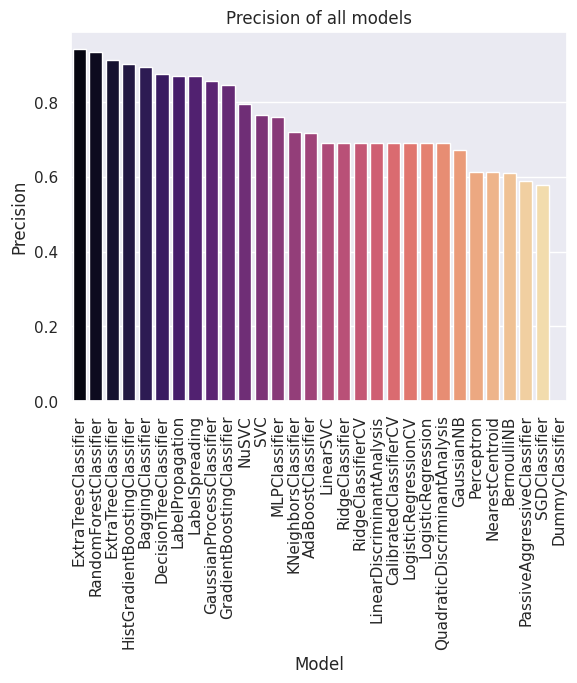

In [50]:
plot('Precision')

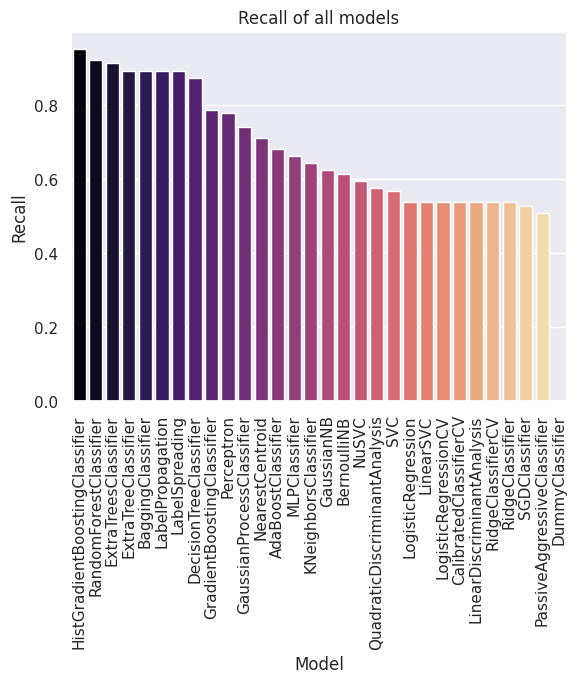

In [51]:
plot('Recall')

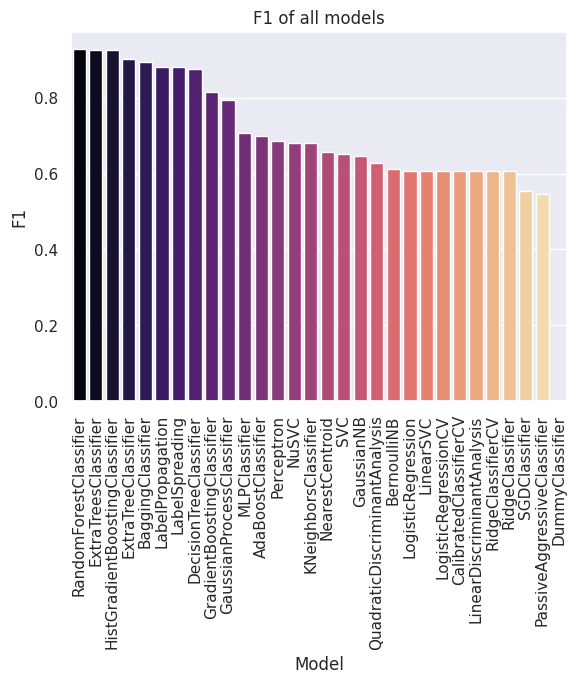

In [52]:
plot('F1')